<a href="https://colab.research.google.com/github/gachet/ad-1-24/blob/main/LOG/Ejer1-1_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Logistic Regression

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

### Lectura de datos


In [6]:
# Load data
df = pd.read_csv('https://drive.google.com/uc?id=1XiPaHHEQRZ5rGwtTalpfDRxpxRS7vgWW',names=['HorasEstudio','Aprueba'])

print(df)

   HorasEstudio  Aprueba
0             2        0
1             3        0
2             4        0
3             5        0
4             6        1
5             7        1
6             8        1
7             9        1
8            10        1


### Regresión Lineal



[0.16666667]
-0.4444444444444444
R Squared :  0.7499999999999999
Mean Absolute Error:  0.20987654320987661
Root Mean Squared Error:  0.24845199749997668


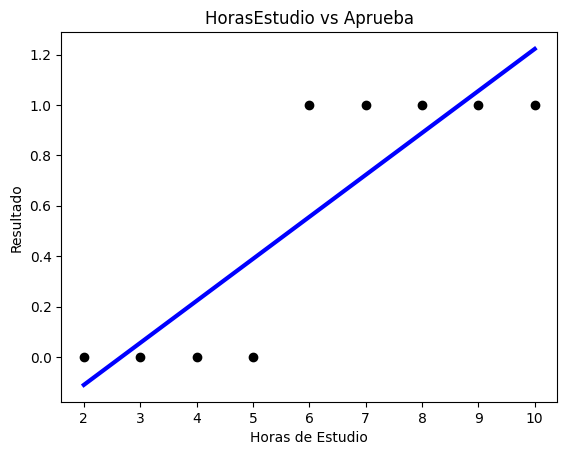

In [7]:
x= df.HorasEstudio.values[:, np.newaxis] # independent variable
y= df.Aprueba                      # dependent variable

# Create linear regression object
lr = lm.LinearRegression()

# Train the model using the training sets
lr.fit(x, y)

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('HorasEstudio vs Aprueba')
plt.ylabel('Resultado')
plt.xlabel('Horas de Estudio')

# add predict value to the data frame
df['Aprueba_Pred'] = lr.predict(x)
print(lr.coef_)
print(lr.intercept_)

# Using built-in function
print ("R Squared : ", r2_score(df.Aprueba, df.Aprueba_Pred))
print ("Mean Absolute Error: ", mean_absolute_error(df.Aprueba, df.Aprueba_Pred))
print ("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Aprueba, df.Aprueba_Pred)))

### Regresión LOgística



Utilizaremos el modelo con la función  logit o sigmoide:

log(p / p(1 - p)) = mx + c

p = 1 / 1 + e^-(mx + c)

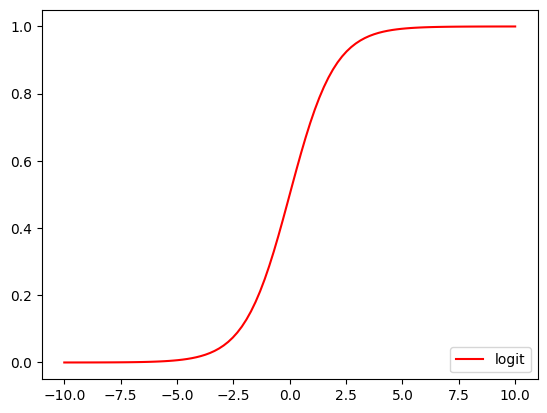

In [8]:
# plot sigmoid function
x = np.linspace(-10, 10, 100)
y = 1.0 / (1.0 + np.exp(-x))

plt.plot(x, y, 'r-', label='logit')
plt.legend(loc='lower right')

La probabilidad de aprobar es  p = .66 y la de no es  f = 1 - p = .33



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


coef [[13.50628991]]
intercept [-74.26211077]
[3.01848789e-21 2.21562684e-15 1.62631173e-09 1.19232005e-03
 9.98860048e-01 9.99999998e-01 1.00000000e+00 1.00000000e+00
 1.00000000e+00]
[0 0 0 0 1 1 1 1 1]


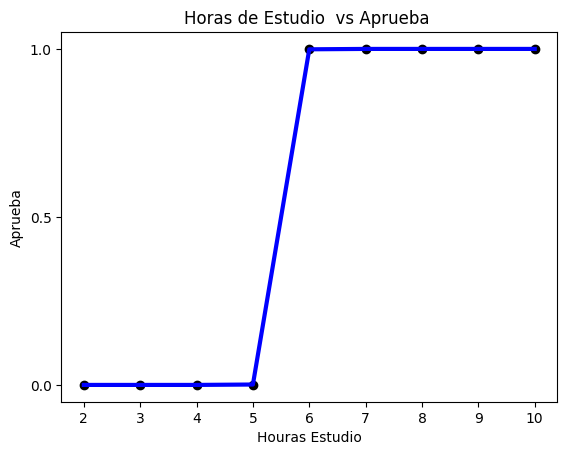

In [21]:
from sklearn.linear_model import LogisticRegression

# manually add intercept
df['intercept'] = 1
#independent_variables = ['HorasEstudio', 'intercept']
independent_variables = ['HorasEstudio']

x = df[independent_variables]       # independent variable
y = df['Aprueba']                      # dependent variable

# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(penalty=None,C=10,max_iter=600000)
model = model.fit(x, y)

# check the accuracy on the training set
model.score(x, y)

print("coef",model.coef_)
print("intercept",model.intercept_)

# predict_proba will return array containing proability of y = 0 and y = 1
print( model.predict_proba(x)[:,1])

# predict will give convert the probability(y=1) values > .5 to 1 else 0
print (model.predict(x))

# plotting fitted line
plt.scatter(df.HorasEstudio, y,  color='black')
plt.yticks([0.0, 0.5, 1.0])
plt.plot(df.HorasEstudio, model.predict_proba(x)[:,1], color='blue', linewidth=3)
plt.title('Horas de Estudio  vs Aprueba ')
plt.ylabel('Aprueba')
plt.xlabel('Houras Estudio')
plt.show()

In [10]:
from sklearn import metrics

# generate evaluation metrics
print ("Accuracy :", metrics.accuracy_score(y, model.predict(x)))
print ("AUC :", metrics.roc_auc_score(y, model.predict_proba(x)[:,1]))

print ("Confusion matrix :",metrics.confusion_matrix(y, model.predict(x)))
print ("classification report :", metrics.classification_report(y, model.predict(x)))

Accuracy : 1.0
AUC : 1.0
Confusion matrix : [[4 0]
 [0 5]]
classification report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



### Plot ROC curve

ROC AUC: 1.00


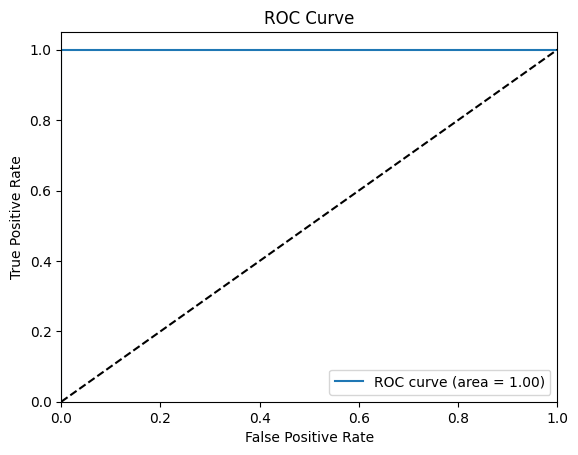

In [11]:
# Determine the false positive and true positive rates
fpr, tpr, _ = metrics.roc_curve(y, model.predict_proba(x)[:,1])

# Calculate the AUC
roc_auc = metrics.auc(fpr, tpr)
print ('ROC AUC: %0.2f' % roc_auc)

# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [1]:
def add_ones(X):
    intercept = np.ones((X.shape[0], 1))
    return np.concatenate((intercept, X), axis=1)

In [2]:
#función sigmoid
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
#xálculo de la hypòtesis
def calc_h(X, theta):
    z = np.dot(X, theta)
    h = sigmoid(z)
    return h

In [12]:
XX = add_ones(x)
theta = np.zeros(XX.shape[1])
h = calc_h(XX, theta)

In [13]:
print(XX)
print(theta)
print(h)

[[ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]]
[0. 0.]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


In [14]:
cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
print(cost)

0.6931471805599453


In [15]:
m = y.size
alpha = 0.01
theta = np.zeros(XX.shape[1])


In [16]:
print(theta)

[0. 0.]


## Entrenamiento del modelo

a fin de encontrar los coeficientes del modelo, es decir los elementos del vector $\theta$, debemos proceder a realizar el gradiente descendente de forma iterativa

In [17]:
import  math
num_iter = 600000
epsilon = 10e-9
J_vals = []
prev = math.inf
for i in range(num_iter):
    h = calc_h(XX, theta)
    cost = (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    J_vals.append(cost)
    if(abs( J_vals[i]- prev) < epsilon) :
            print("Convergencia Alcanzada !", i ," iteraciones")
            break
    prev = J_vals[i]
    gradient = np.dot(XX.T, (h - y)) / m
    theta -= alpha * gradient
    if i % 20000 == 0:
        print('iteracion ',i,'coste ', cost)

print('Adjusted coefficient: {}'.format(theta))

iteracion  0 coste  0.6931471805599453
iteracion  20000 coste  0.12133616028658066
iteracion  40000 coste  0.08894016483523796
iteracion  60000 coste  0.07369589851343646
iteracion  80000 coste  0.06409410145995394
iteracion  100000 coste  0.057229805757280684
iteracion  120000 coste  0.051962690136874816
iteracion  140000 coste  0.047735043786407215
iteracion  160000 coste  0.044234645012942435
iteracion  180000 coste  0.041269829968127156
iteracion  200000 coste  0.03871478492728445
iteracion  220000 coste  0.036482606386810765
iteracion  240000 coste  0.03451081967768262
iteracion  260000 coste  0.032753044918539156
iteracion  280000 coste  0.031173930876163023
iteracion  300000 coste  0.029745933734212675
iteracion  320000 coste  0.028447190451777453
iteracion  340000 coste  0.027260069242321477
iteracion  360000 coste  0.026170154118819414
iteracion  380000 coste  0.025165516391899415
iteracion  400000 coste  0.024236181029129035
iteracion  420000 coste  0.023373728502006825
itera

## Variación de la función de pérdida

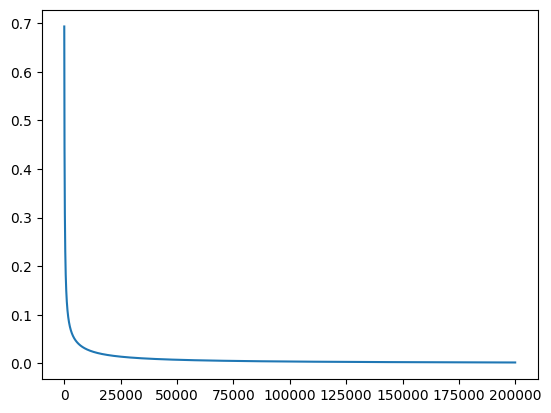

In [ ]:
plt.plot(range(len(J_vals)), J_vals)